In [1]:
from google.cloud import storage
import numpy as np
import pandas as pd
from sklearn.preprocessing import SplineTransformer
import wfdb


In [2]:
record = wfdb.rdrecord('3544749_0005' , pn_dir = 'mimic3wdb-matched/1.0/p00/p000020')
display(record.__dict__)

{'record_name': '3544749_0005',
 'n_sig': 4,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 7098177,
 'base_time': datetime.time(17, 48, 34, 810000),
 'base_date': None,
 'comments': [],
 'sig_name': ['II', 'AVF', 'ABP', 'PAP'],
 'p_signal': array([[-1.16279070e-01, -1.00000000e-01,  7.28000000e+01,
          2.76000000e+01],
        [-1.16279070e-01, -1.00000000e-01,  8.00000000e+01,
          2.84000000e+01],
        [-1.16279070e-01, -1.00000000e-01,  8.72000000e+01,
          2.96000000e+01],
        ...,
        [-4.65116279e-02, -4.00000000e-02,  5.28000000e+01,
          9.00000000e+01],
        [-9.30232558e-02, -4.00000000e-02,  5.36000000e+01,
          9.00000000e+01],
        [-4.65116279e-02, -4.00000000e-02,  5.68000000e+01,
          9.00000000e+01]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['3544749_0005.dat',
  '3544749_0005.dat',
  '3544749_0005.dat',
  '3544749_0005.dat'],
 'fmt': ['80', '80', '80', '80'],
 '

AxesSubplot(0.125,0.125;0.775x0.755)


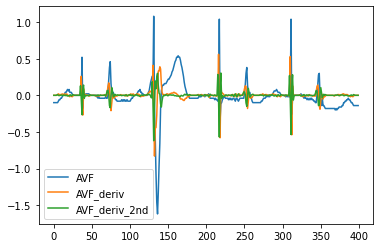

In [3]:
df = pd.DataFrame(record.p_signal, columns = record.sig_name)
##print(df['AVF'].shape)
df['AVF_deriv'] = pd.Series(np.gradient(df['AVF']))
df['AVF_deriv_2nd'] = pd.Series(np.gradient(df['AVF_deriv']))

print(df[['AVF', 'AVF_deriv', 'AVF_deriv_2nd']].head(400).plot())
